# Deep Learning
## Practical Session 02
Görkem Saygili & Busra Ozgode Yigin, Department of Cognitive Science and Artificial Intelligence – Tilburg University

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Convolutional Neural Networks
<div class="alert alert-block alert-info">
This Python Notebook is based on <a href=https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb>https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb</a>, and <a href=https://www.kaggle.com/code/ddatad/cnn-101-for-image-classifications>https://www.kaggle.com/code/ddatad/cnn-101-for-image-classifications</a>
</div>

In this notebook we will define a simple convolutional neural network to classify [MNIST digits](http://yann.lecun.com/exdb/mnist) and visualize the learned representation.

The network to be created will have 3 Convolutional layers (`Conv2D`). The first two `Conv2D` layers will be followed by a 2D Max Pooling (`MaxPooling2D`). After the last convolution, two fully connected layers (`Dense`) will be added.

You can check the Keras documentation of the mentioned layers on the links below:
 - `Conv2D`: https://keras.io/layers/convolutional/#conv2d
 - `MaxPooling2D`: https://keras.io/layers/pooling/#maxpooling2d
 - `Dense`: https://keras.io/layers/core/#dense

First of all, we need to import libraries:

In [109]:
import keras
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True
import numpy as np
import pandas as pd
import tensorflow as tf

### MNIST Dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

## Loading Dataset
First of all, the MNIST data set, which is embedded in Keras, is imported.

In [110]:
from keras.datasets import mnist
# The data, shuffled and split between train and test sets:
(trainX, trainy), (testX, testy) = mnist.load_data()
num_classes=len(np.unique(trainy))
print(f'num of classes = {num_classes}')

num of classes = 10


In [111]:
print(trainX.shape)
print(trainy.shape)
print(str(trainX.shape[0]) + ' train samples')
print(str(testX.shape[0]) + ' test samples')

(60000, 28, 28)
(60000,)
60000 train samples
10000 test samples


We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28x28 pixels.

Let's create a plot of the first nine images in the training dataset.

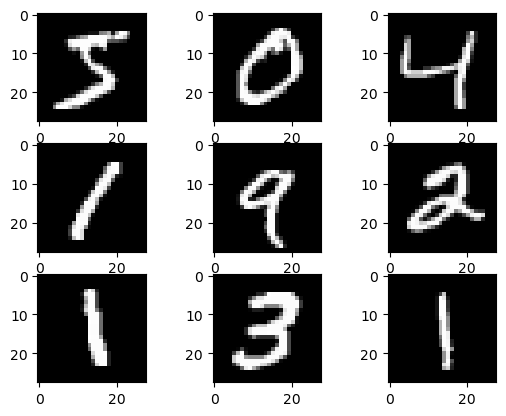

In [112]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 1.1. Dataset Preprocessing
There are 10 classes and that classes are represented as unique integers. We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the `to_categorical()` utility function.

In [113]:
from tensorflow.keras.utils import to_categorical
# Convert a class vector (integers) to binary class matrix.
# Get only first 6000 samples from training and first 1000 samples from test set.
y_train = to_categorical(trainy[:6000])
y_test = to_categorical(testy[:1000])

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.
So, we need to normalize the pixel values, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [114]:
# convert from integers to floats
X_train = trainX.astype('float32')
X_test = testX.astype('float32')

# reshape images to (28, 28, 1) and get only first 6000 training sample
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))[:6000]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))[:1000]

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [115]:
# the size of single image
print(X_train.shape[1:])
print(y_train)
print(X_train.shape)

(28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(6000, 28, 28, 1)


## 1.2. Building our network (Exercise 1)

As in the first practical, we will be using a Keras sequential model.

To start building our neural network, we add the convolutional and max pooling layers.
It is important to note that a ConvNet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension).
In our case, we will configure our ConvNet to process inputs of size `(28, 28)`, which is the format of MNIST images. We do this by passing the argument `input_shape=(28, 28)` to our first convolutional layer.

The first `Conv2D` layer should have 32 filters of size 3 by 3, and specify its input shape. The second and the third `Conv2D` layers should have 32 filters of size 3 by 3.
Remember that the first two `Conv2D` layers should be followed by 2 by 2 `MaxPooling2D` layers. All `Conv2D` should have `relu` activation.

In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Input

inputs = Input(shape=(28, 28, 1))


### PUT YOUR CODE HERE ###
# Create a sequential model
model = Sequential()
# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))


### END ###

Let's display the architecture of our convnet so far:

In [119]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

You should see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width and height dimensions tend to shrink as we go deeper into the network. As expected, the number of channels is controlled by the corresponding argument passed to the `Conv2D` layers (e.g., 32 or 64).

The next step is to feed our last output tensor (of shape `(3, 3, 32)`) into a densely-connected classifier network (a stack of `Dense` layers) — such classifiers process vectors, which are 1D, whereas our current output is a 3D tensor.
So first, we will have to flatten our 3D outputs to 1D using the `Flatten` layer (https://keras.io/layers/core/#flatten), and then add a few `Dense` layers on top. Use 64 units with ReLU activation function for the first fully-connected layer. Given that we are trying to solve a classification problem with 10 classes, define the last layer appropriately.

In [120]:
### PUT YOUR CODE HERE ###
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))

# Add the last Dense layer.
model.add(layers.Dense(10, activation='softmax'))

### END ###

Now we can check the shape of the output of the Flatten layer, which should be 1D.

In [121]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,962 (148.29 KB)

 Trainable params: 37,962 (148.29 KB)

 Non-trainable params: 0 (0.00 B)

As you can see, our `(3, 3, 32)` outputs were flattened into vectors of shape `(288)`, before going through two `Dense` layers.

## 1.3. Training the network (Exercise 2)

Now, let's train our ConvNet on (a reduced version of) the MNIST training set and evaluate it on test set.

It is better to use a separate validation dataset, e.g. by splitting the train dataset into train and validation sets. We will not split the data in this case, and instead use the test dataset as a validation dataset to keep the example simple.

The test dataset can be used like a validation dataset and evaluated at the end of each training epoch. This will result in a trace of model evaluation scores on the train and test dataset each epoch that can be plotted later.

You can now compile the model using the `rmsprop` optimizer and the `categorical_crossentropy` loss function. Then train the model for 5 epochs with batches of size 64 and evaluate it on the test data.

In [145]:
### PUT YOUR CODE HERE ###
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs= 5, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)
### END ###

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9896 - loss: 0.0468 - val_accuracy: 0.9690 - val_loss: 0.1004
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9730 - val_loss: 0.0974
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9973 - loss: 0.0105 - val_accuracy: 0.9740 - val_loss: 0.0998
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9977 - loss: 0.0052 - val_accuracy: 0.9780 - val_loss: 0.1041
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.9760 - val_loss: 0.1133
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0660
0.11330165714025497
0.9760000109672546


Once the model has been evaluated, we can present the results.

There are two key aspects to present: the diagnostics of the learning behavior of the model during training and the estimation of the model performance.

First, the diagnostics involve creating a line plot showing model performance on the train and test set during training. These plots are valuable for getting an idea of whether a model is overfitting, underfitting, or has a good fit for the dataset.

We will create a single figure with two subplots, one for loss and one for accuracy. The blue lines will indicate model performance on the training dataset and orange lines will indicate performance on the hold out test dataset. The summarize_diagnostics() function below creates and shows this plot given the collected training histories. The plot is saved to file, specifically a file with the same name as the script with a ‘png‘ extension.

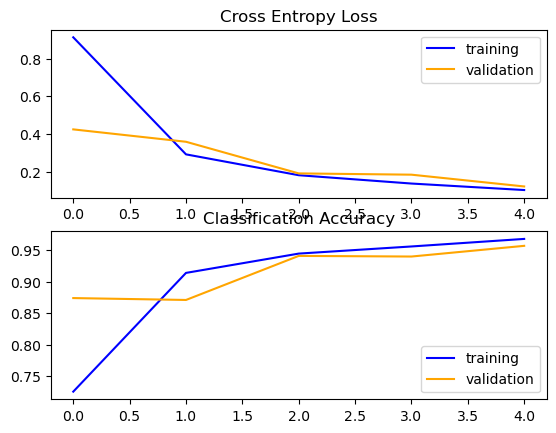

In [123]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.legend(['training','validation'])

	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend(['training', 'validation'])
	plt.show()

summarize_diagnostics(history)

Figures show the learning curves of the model during training on the train and test dataset, both with regards to the loss and accuracy.

Next, we can report the final model performance on the test dataset.

We can print the test accuracy and confusion matrix:

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('test_accuracy: %.3f' % (acc))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 84   0   0   0   0   0   1   0   0   0]
 [  1 124   1   0   0   0   0   0   0   0]
 [  3   0 111   0   0   0   0   2   0   0]
 [  0   0   0 105   0   2   0   0   0   0]
 [  0   1   0   0 108   0   0   0   0   1]
 [  0   0   0   3   0  81   0   1   1   1]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   1   3   0   0   0  95   0   0]
 [  8   0   1   3   0   0   0   1  74   2]
 [  1   0   0   2   2   0   0   1   2  86]]
test_accuracy: 0.953


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the model achieved a classification accuracy of 96.7%.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Actual Label = 8
Prediction Label = 8


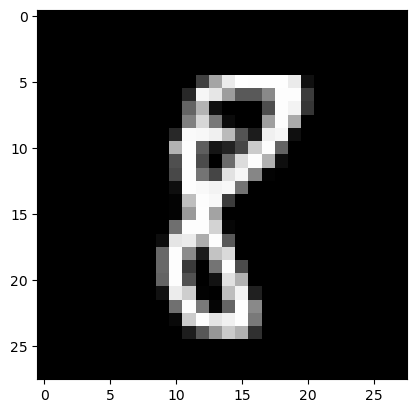

In [125]:
import matplotlib.pyplot as plt
## Let's look at one of the images prediction
index = 1120
actual = testy[index]
plt.imshow(testX[index], cmap=plt.get_cmap('gray'))
pred = model.predict(testX)[index].argmax()
print(f'Actual Label = {actual}')
print(f'Prediction Label = {pred}')

## 1.4. Visualizing what ConvNets learn

It is often said that deep learning models are "black boxes", learning representations that are difficult to extract and present in a human-readable form. While this is partially true for certain types of deep learning models, it is less the case for ConvNets. The representations learned by ConvNets are highly amenable to visualization, especially so when applied to visual tasks. Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. We won't survey all of them, but we will cover two of the most accessible and useful ones:

* Visualizing intermediate ConvNet outputs ("intermediate activations"). This is useful to understand how successive ConvNet layers transform their input, and to get a first idea of the meaning of individual ConvNet filters.
* Visualizing ConvNets filters. This is useful to understand precisely what visual pattern or concept each filter in a ConvNet is receptive to.

We will use as input an example of 10 class that was not part of the training set:

In [126]:
img_tensor = X_test[[3, 2, 1, 18, 4, 8, 11, 0, 61, 7], :, :].reshape((10, 28, 28, 1))

Let's display our pictures. For that, we will use the helper function `plot_grid` that display a set of images following a grid layout (defined in plot_grid.py). The function expects a tensor of shape (nb_images, image_size, image_size) as its first and main argument.

You can call the Python files (plot_grid.py) you've saved within the same directory and use the functions inside them within this notebook by following the steps below:

Or you can just copy its content here:

In [127]:
import math
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(img_tensor, title=None, cmap='viridis', images_per_row=16,
              scale=1., postprocess=False, margin=1):
    '''
    Displays images in a grid layout
    Takes a tensor of shape (nb_images, size, size) as input
    '''
    # Number of images to display
    nb_images = img_tensor.shape[0]
    size = img_tensor.shape[1]

    # We will tile the images in this matrix
    nb_rows = math.ceil(nb_images / images_per_row)
    height = nb_rows * size + (nb_rows - 1) * margin
    width = images_per_row * size + (images_per_row - 1) * margin
    display_grid = np.zeros((height, width))

    # We'll tile each image into this big horizontal grid
    for row in range(nb_rows):
        for col in range(images_per_row):
            idx = row * images_per_row + col
            if idx < nb_images:
                image = np.copy(img_tensor[idx, :, :])
                # Post-process the feature to make it visually palatable
                if postprocess:
                    image -= image.mean()
                    image /= (image.std() + 1e-5)
                    image *= 64
                    image += 128
                    image = np.clip(image, 0, 255).astype('uint8')
                horizontal_start = row * size + row * margin
                horizontal_end = horizontal_start + size
                vertical_start = col * size + col * margin
                vertical_end = vertical_start + size
                display_grid[horizontal_start:horizontal_end, vertical_start:vertical_end] = image

    # Display the grid
    scale = scale / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    if title is not None:
        plt.title(title)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap=cmap)
    plt.show()


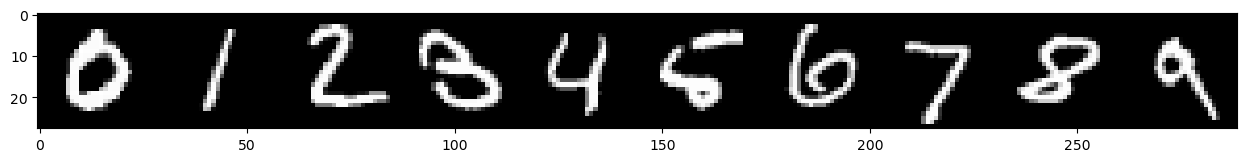

In [128]:
import matplotlib.pyplot as plt

plot_grid(img_tensor.squeeze(), cmap='gray', images_per_row=10, scale=1.5)

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we will use the Keras class `Model`. A `Model` is instantiated using two arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the `Sequential` models that you are familiar with, mapping the specified inputs to the specified outputs. What sets the `Model` class apart is that it allows for models with multiple outputs, unlike `Sequential`.

In [132]:
from tensorflow.keras import models

_ = model.predict(X_train[:1]) 
# Extracts the outputs of the top 5 layers:
layer_outputs = [layer.output for layer in model.layers[:5]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


When fed an image input, this model returns the values of the layer activations in the original model. This is the first time you encounter a multi-output model: until now the models you have seen only had exactly one input and one output. In the general case, a model could have any number of inputs and outputs. This one has one input and 5 outputs, one output per layer activation.

In [136]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


## Exercise 3 - Visualization of the activations

For instance, this is the activation of the first convolution layer for our 10 digits:

In [137]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(10, 26, 26, 32)


It's a 26x26 feature map with 32 channels. When can then display individual channels to see what they encode. Here is the result I obtain for the 2<sup>nd</sup> and the 29<sup>th</sup> channels of my model:

![Activation of layer 2](activation_1.png)

![Activation of layer 29](activation_2.png)

The first channel represented seems to have learned to encode "vertical bars" or something similar (note that your own channels may be different, since the specific filters learned by convolution layers are not deterministic). The second channel displayed looks like a "bottom edge" detector.

Try to display the 32 channels of the first layer of your model and see whether you can spot interesting patterns:

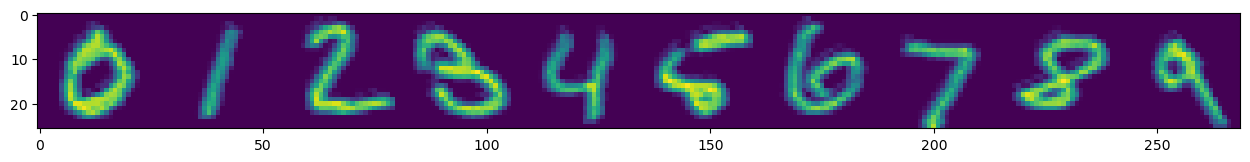

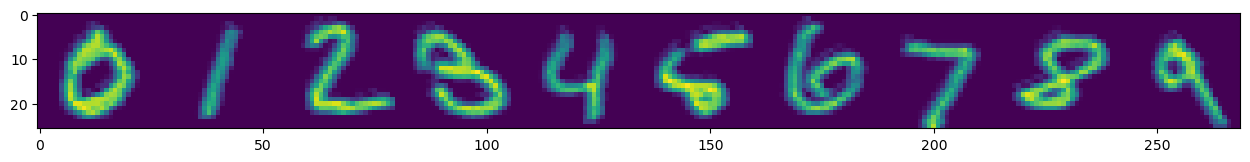

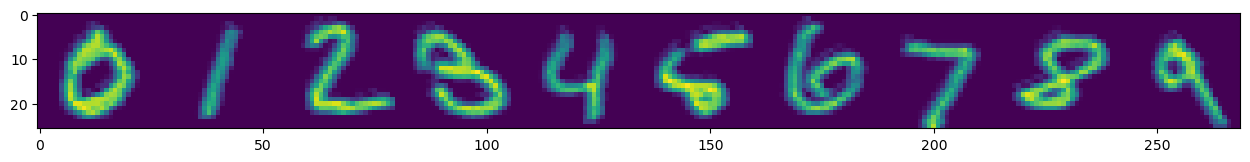

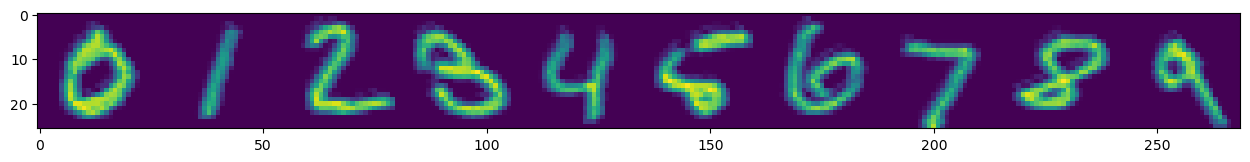

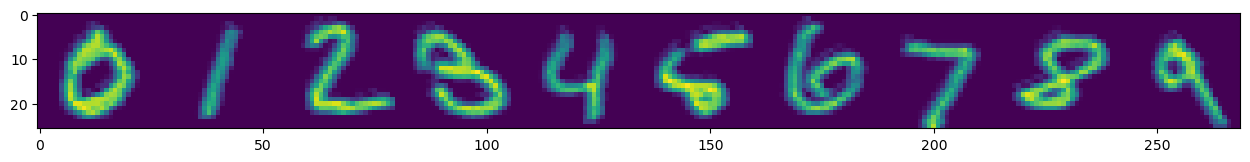

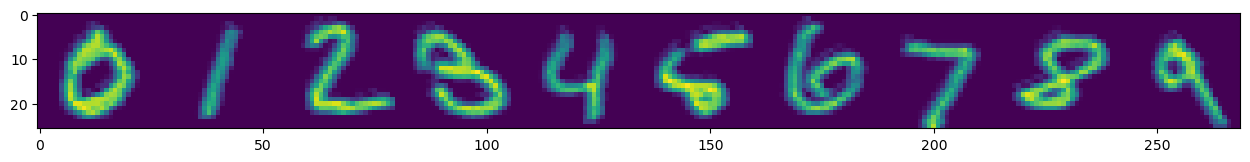

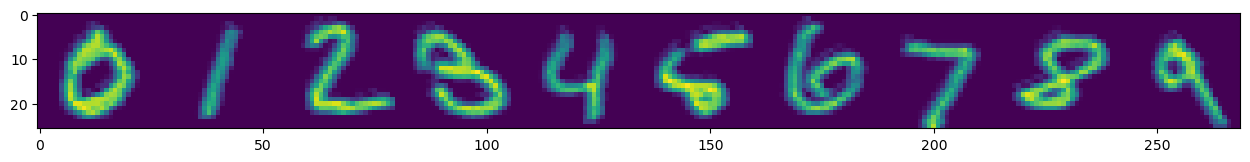

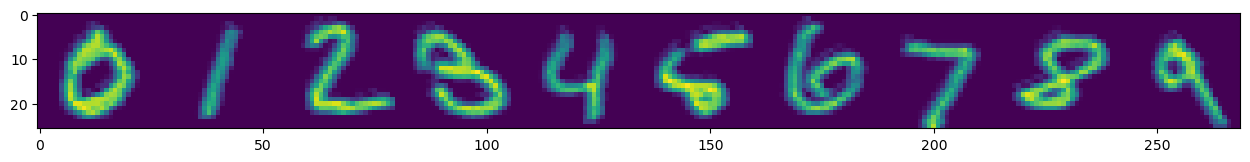

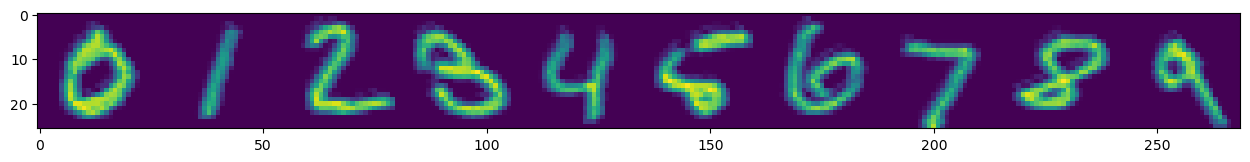

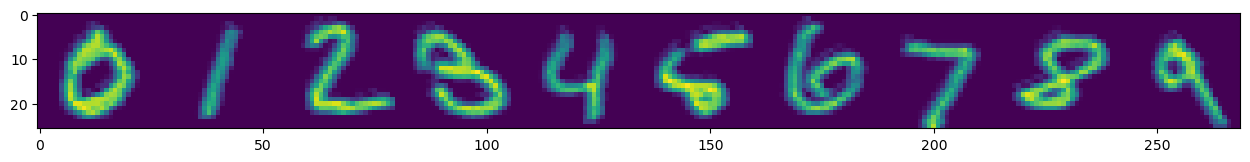

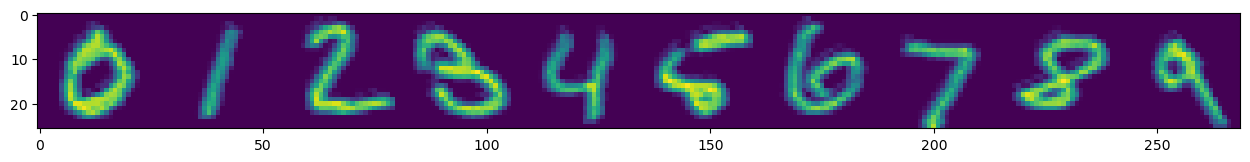

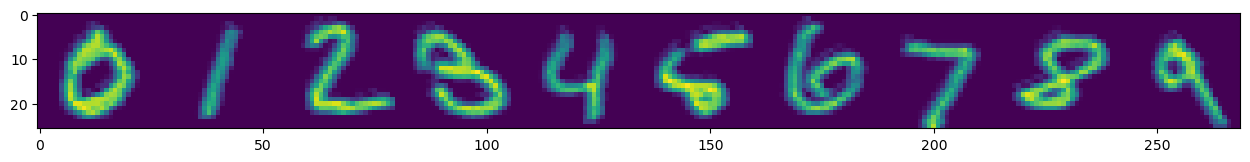

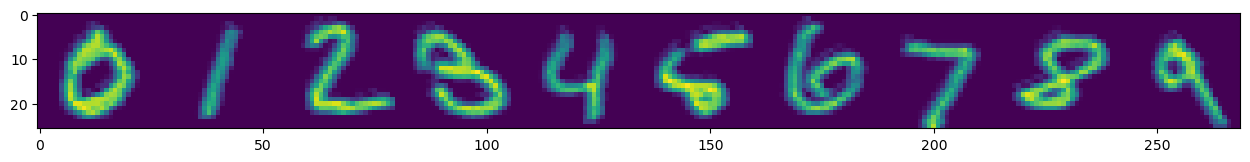

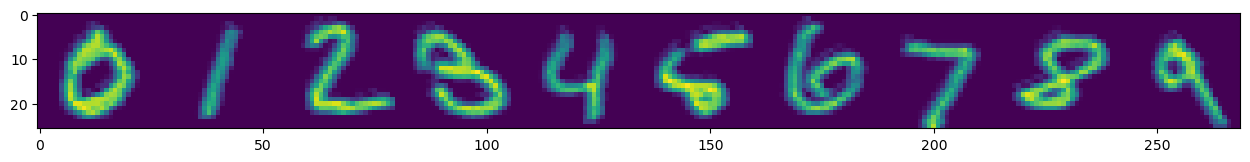

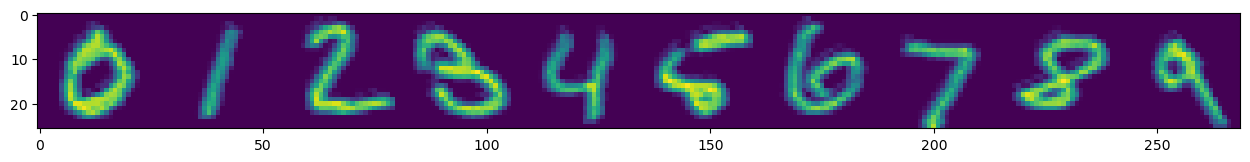

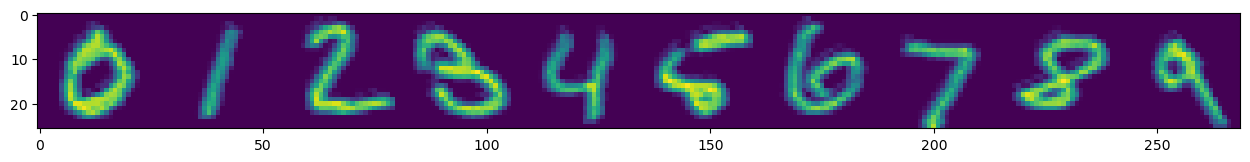

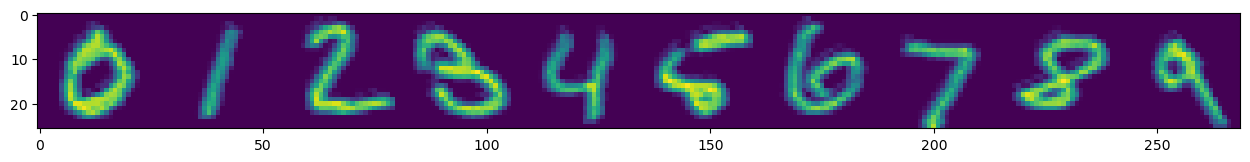

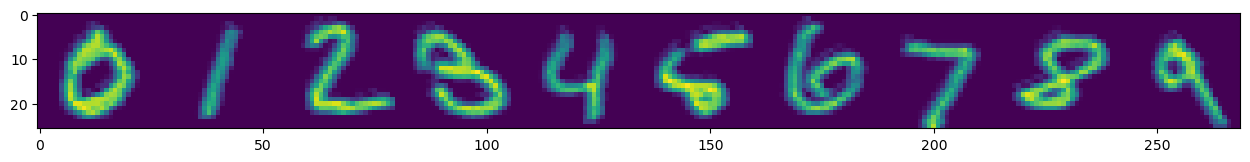

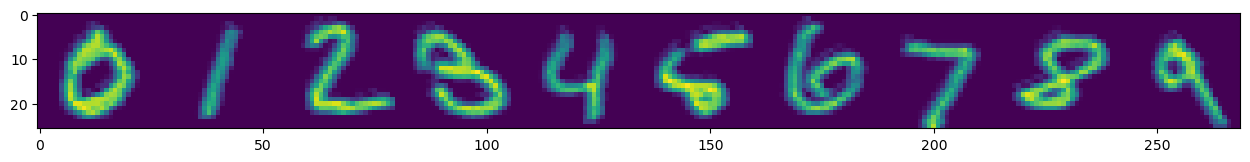

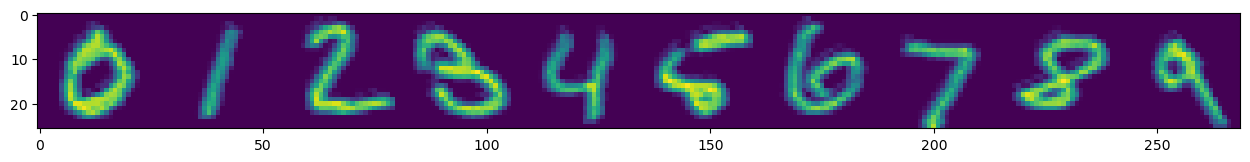

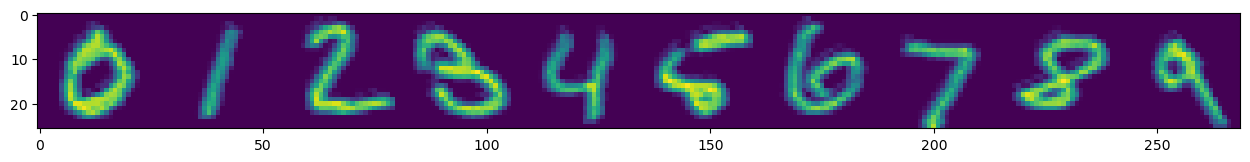

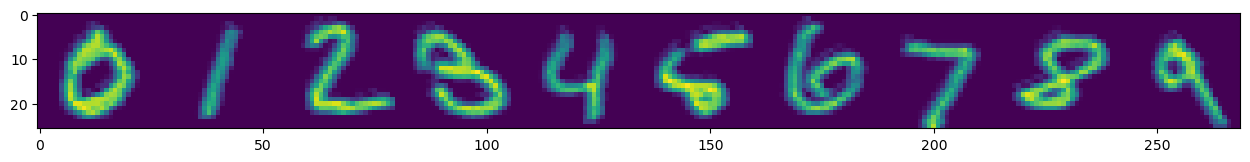

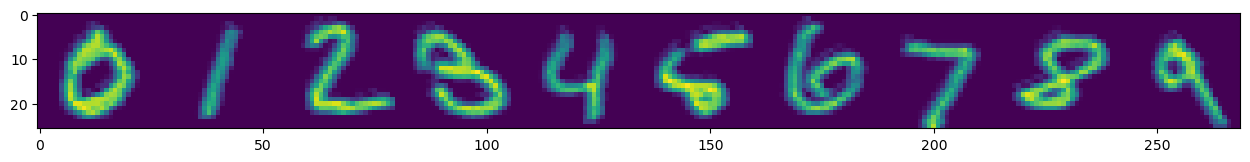

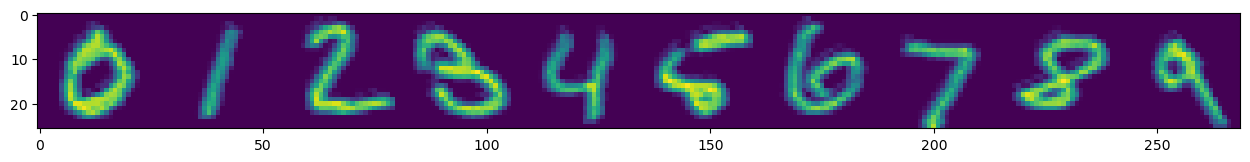

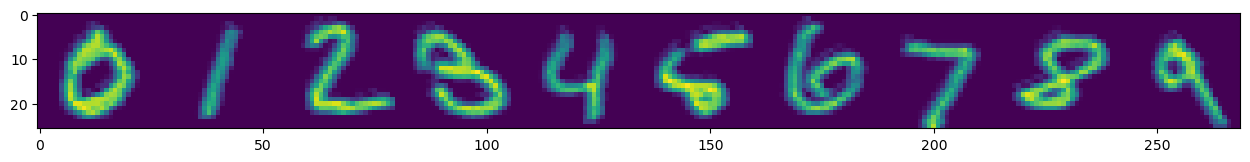

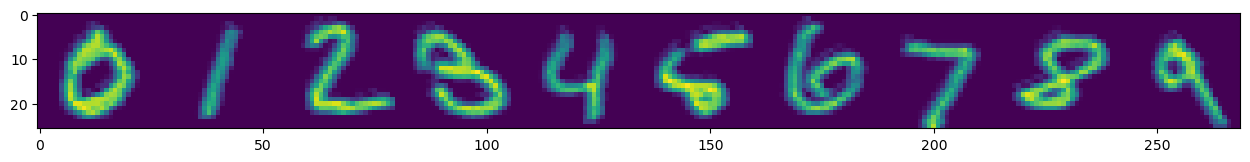

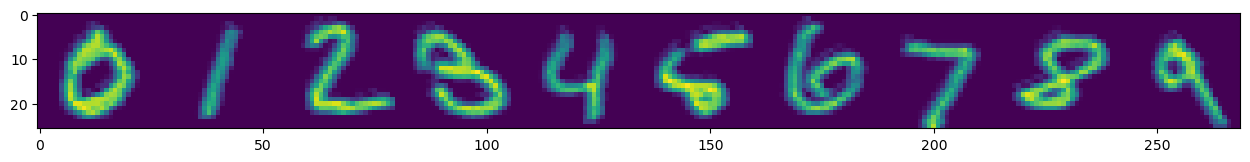

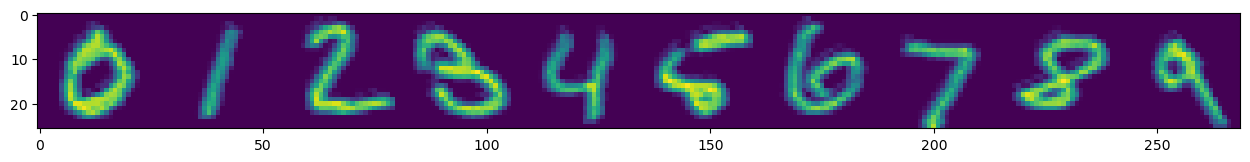

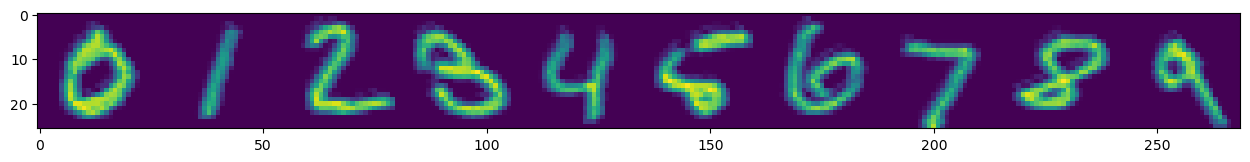

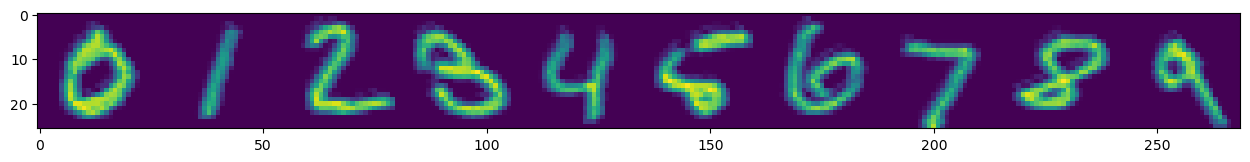

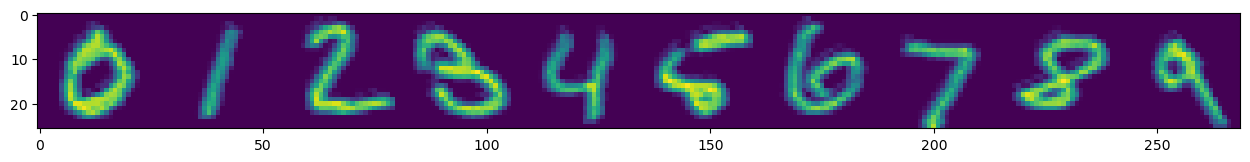

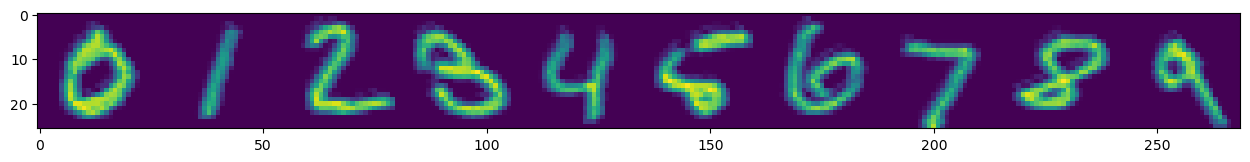

In [146]:
### PUT YOUR CODE HERE ###
for i in range(first_layer_activation.shape[3]):
    plot_grid(first_layer_activation[:, :, :, channel], images_per_row=10, scale=1.5)
### END ###

At this point, let's go and plot a complete visualization of all the activations in the network. We will extract and plot every channel in each of our 5 activation maps, focusing on a single digit, with channels stacked side by side.

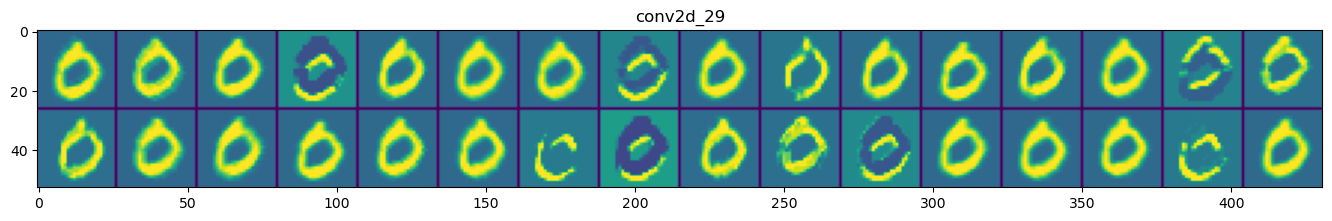

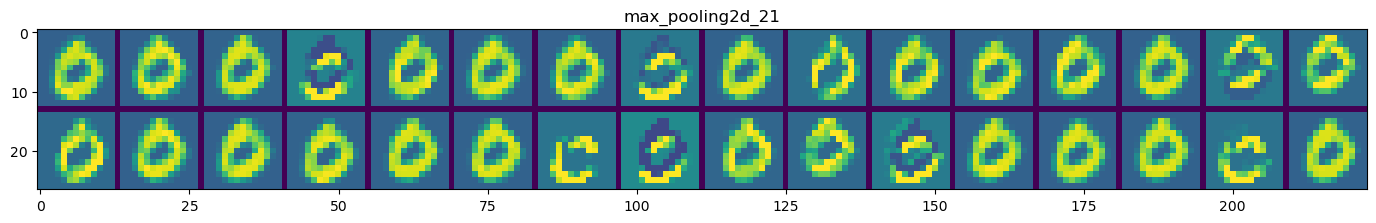

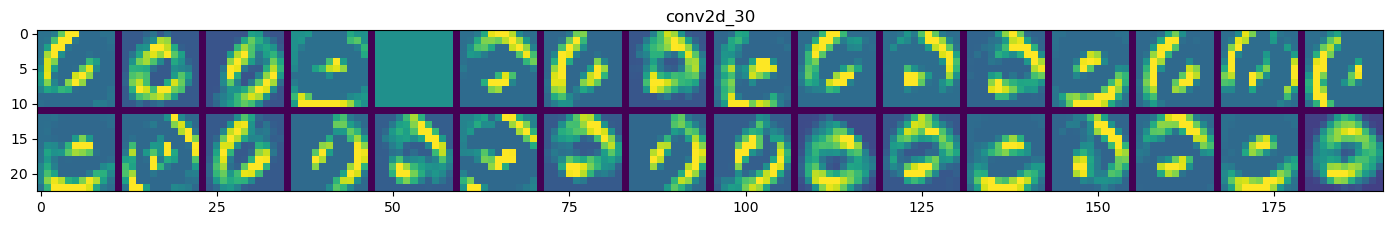

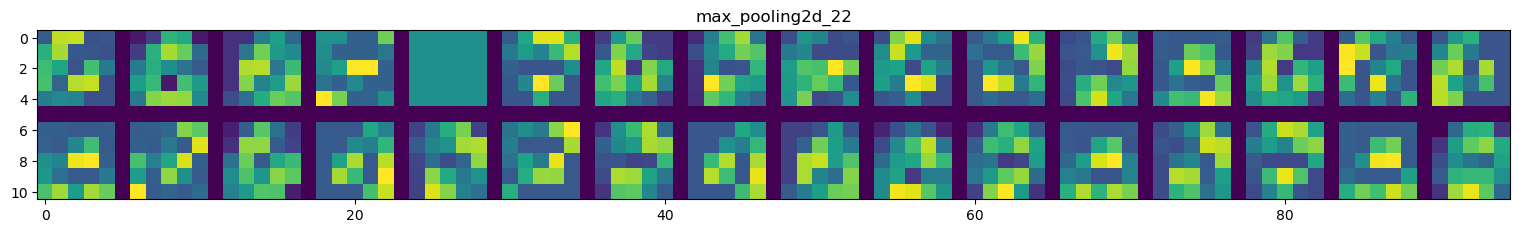

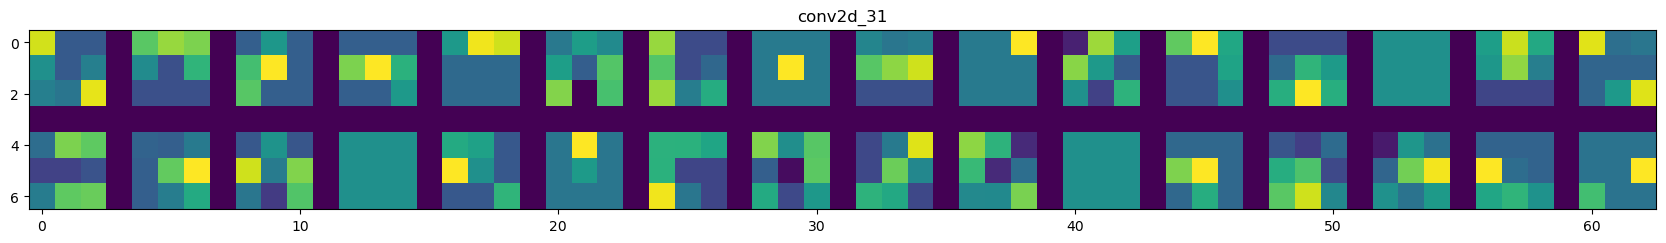

In [147]:
# These are the names of the layers, so that we can have them as part of our plot

layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

# Now let's display our feature maps
### PUT YOUR CODE HERE ###

for layer_name, layer_activation in zip(layer_names, activations):
    plot_grid(layer_activation[0].transpose(2,0,1), title=layer_name, postprocess=True)

### END ###

A few remarkable things to note here:

* The first layer acts as a collection of various edge detectors. At that stage, the activations are still retaining almost all of the information present in the initial picture.
* As we go higher-up in a convolutional neural network, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level concepts, such as specific strokes here (e.g. vertical/horizontal bars, round shapes, ...). Higher-up representations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are usually activated by the input image, but in the following layers more and more filters might be blank. This means that the pattern encoded by the filter isn't found in the input image.

We have just evidenced a very important universal characteristic of the representations learned by deep neural networks (not just CNNs): the features extracted by a layer get increasingly abstract with the depth of the layer. The activations of layers higher-up carry less and less information about the specific input being seen, and more and more information about the target. A deep neural network effectively acts as an __information distillation pipeline__, with raw data going in (in our case, color pictures), and getting repeatedly transformed so that irrelevant information gets filtered out (e.g. the specific visual appearance of the image) while useful information get magnified and refined (e.g. the class of the image).

This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which abstract objects were present in it (e.g. bicycle, tree) but could not remember the specific appearance of these objects. In fact, if you tried to draw a generic bicycle from mind right now, chances are you could not get it even remotely right, even though you have seen thousands of bicycles in your lifetime. You brain has learned to completely abstract its visual input, to transform it into high-level visual concepts while completely filtering out irrelevant visual details, making it tremendously difficult to remember how things around us actually look.

## Exercise 4 - Visualizing ConvNet filters

Another easy thing to do to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. This can be done with __gradient ascent in input space__: applying __gradient descent__ to the values of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image would be one that the chosen filter is maximally responsive to.

The process is simple: we will build a loss function that maximizes the value of a given filter in a given convolution layer, then we will use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value. For instance, here's a loss for the activation of filter 0 in the layer "conv2d_2":

To implement gradient descent, we will need the gradient of this loss with respect to the model's input. To do this, we will use the
`gradients` function packaged with the `backend` module of Keras:

In [156]:
import keras.backend as K

def get_loss_and_gradient(image, layer_name, filter_index=0):
    with tf.GradientTape(persistent=True) as gtape:
        input_images =  tf.convert_to_tensor(image, dtype=tf.float32)#tf.constant(image.astype(np.float32))
        gtape.watch(input_images)
        model_ = tf.keras.models.Model(model.layers[0].input, model.get_layer(layer_name).output)
        layer_output = model_(input_images)
        loss = tf.reduce_sum(layer_output[:,:,:,filter_index])

    # The call to `gradient` returns a list of tensors (of size 1 in this case)
    # hence we only keep the first element -- which is a tensor.
    grads = gtape.gradient(loss, input_images)
    # We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
    return loss, grads


A non-obvious trick to use for the gradient descent process to go smoothly is to normalize the gradient tensor, by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within a same range.

Now we need a way to compute the value of the loss tensor and the gradient tensor, given an input image.

In [157]:
import numpy as np

# Let's test it:
loss_value, grads_value = get_loss_and_gradient(np.random.rand(1, 28, 28, 1), 'conv2d_29', 3)


At this point we can define a Python loop to do stochastic gradient descent:

In [158]:
# We start from an image with some noise
input_img_data = np.random.random((1, 28, 28, 1)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = get_loss_and_gradient(input_img_data, 'conv2d_29', 3)
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

The resulting image tensor will be a floating point tensor of shape `(1, 32, 32, 3)`, with values that may not be integer within `[0, 255]`. Hence we would need to post-process this tensor to turn it into a displayable image. The utility function `deprocess_image` (defined in `deprocess_image.py`) can do that for you.

Now we have all the pieces, let's put them together into a Python function that takes as input a layer name and a filter index, and that returns a valid image tensor representing the pattern that maximizes the activation the specified filter:

In [169]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=28):
    ### PUT YOUR CODE HERE ###
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.

    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 1)) * 20 + 128.

    # Run gradient ascent for 40 steps
    
    step = 1
    for i in range(40):
      loss_value, grads_value = get_loss_and_gradient(input_img_data, layer_name, filter_index)

      input_img_data += grads_value * step # update the input image

    img = input_img_data[0].numpy()

    return deprocess_image(img)
    ### END ###

Let's try this:

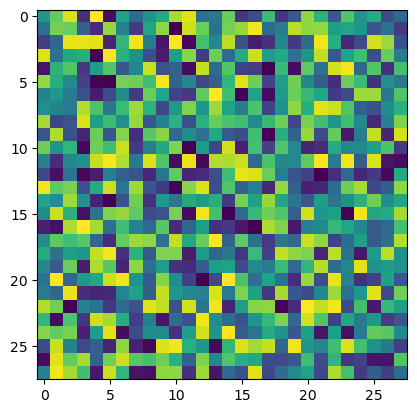

In [170]:
import matplotlib.pyplot as plt

plt.imshow(generate_pattern('conv2d_29', 3, size=28).squeeze())
plt.show()

For example, one of the filters I obtained was maximally responsive to a vertical bar in the top-center of the image:

![Pattern of one filter](filter.png)

Now the fun part: we can start visualising every single filter in every layer. Using `plot_grid` again, display the filters of each convolutional layer in a grid.

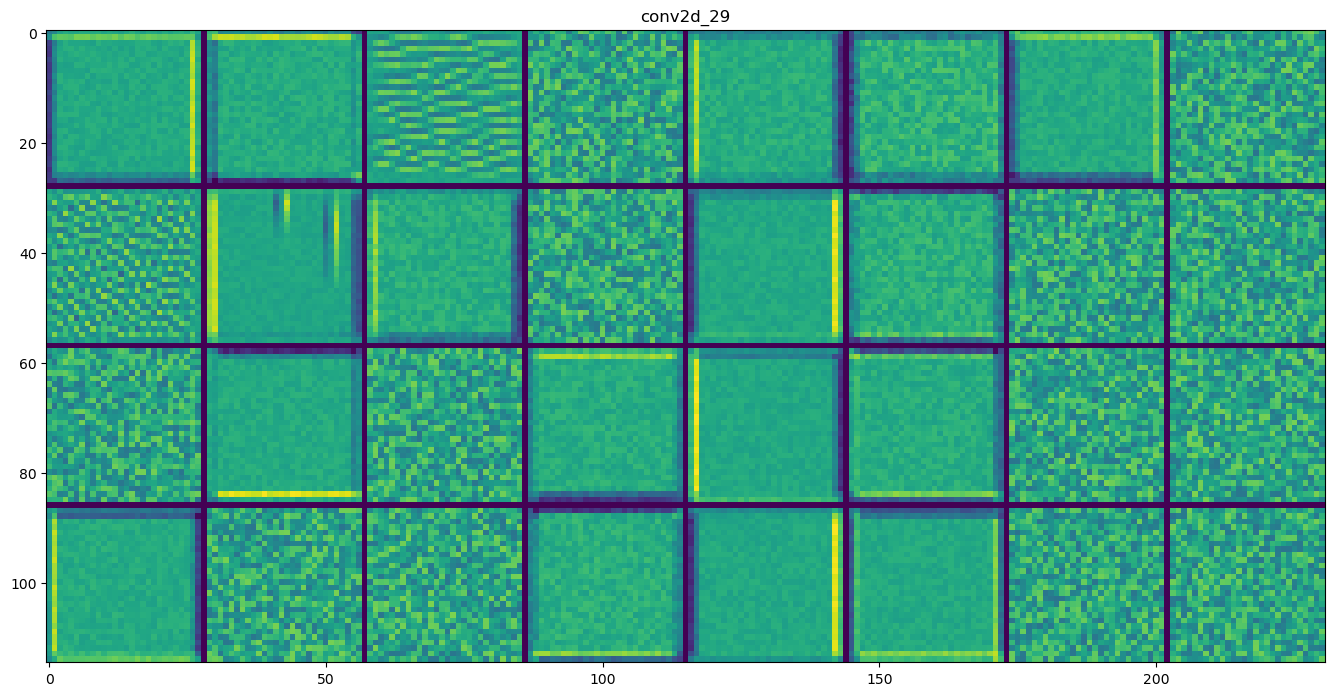

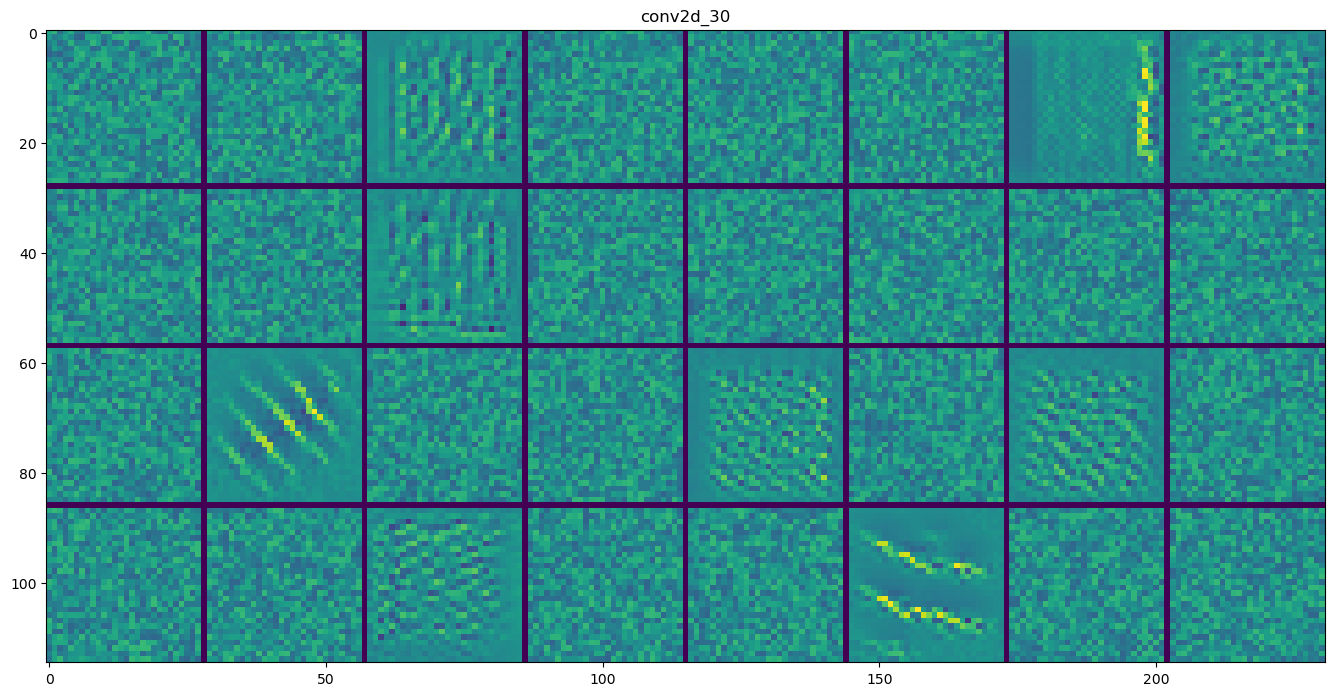

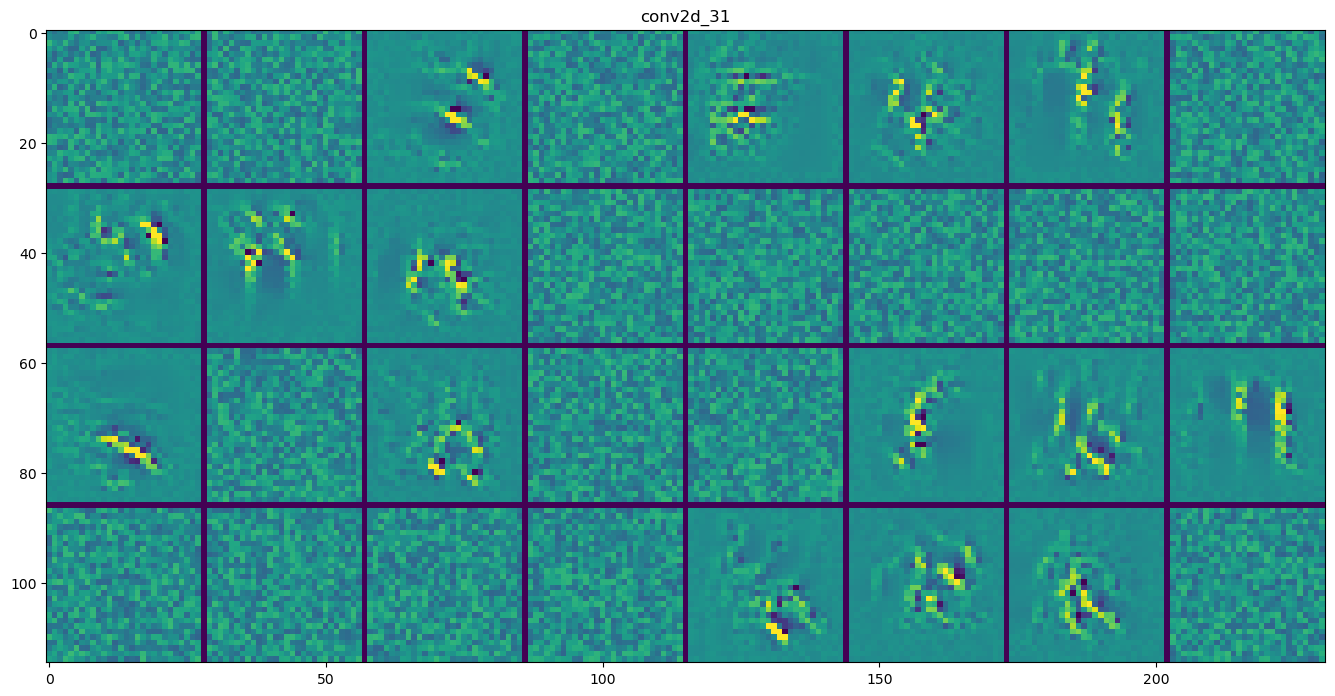

In [172]:
### PUT YOUR CODE HERE ###

for i in ['conv2d_29','conv2d_30','conv2d_31']:
    size=28
    nb_filters=32
    
    filter_img = np.zeros((nb_filters, size, size, 3))
    for f in range(nb_filters):
        filter_img[f] = generate_pattern(i, f, size=size)
        
    plot_grid(filter_img[:,:,:,0].squeeze(), title = i, images_per_row = 8, scale = 2)    

### END ###

These filter visualizations tell us a lot about how ConvNet layers see the world: each layer in a ConvNet simply learns a collection of filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes signals into a bank of cosine functions. The filters in these ConvNet filter banks get increasingly complex and refined as we go higher-up in the model.

# Exercise 5 - Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

It is common to perform transfer learning with predictive modeling problems that use image data as input. This may be a prediction task that takes photographs or video data as input.

For these types of problems, it is common to use a deep learning model pre-trained for a large and challenging image classification task such as the ImageNet 1000-class photograph classification competition.

### CIFAR10 Dataset

We will use transfer learning to classify images from [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. Let's load the dataset and apply some preprocessing steps to make it ready as inputs of transfer learning:

In [174]:
from keras.datasets import cifar10
# The data, shuffled and split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [175]:
from tensorflow.keras.utils import to_categorical
# Dataset Preprocessing
y_train = to_categorical(y_train) # Converts a class vector (integers) to binary class matrix.
y_test = to_categorical(y_test)
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

Let's fit our model, constructed previous section, on CIFAR10 dataset. And see the classification accuracy for test set. We won't apply any transfer learning in this step, just fit our previous model on CIFAR10 dataset.

In [178]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

### PUT YOUR CODE HERE ###
# Create a sequential model
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3,), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size = 64, validation_data=(X_test, y_test))
(test_loss, test_acc) = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

### END ###

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3309 - loss: 1.8314 - val_accuracy: 0.4960 - val_loss: 1.3909
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5320 - loss: 1.3288 - val_accuracy: 0.5069 - val_loss: 1.4517
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5931 - loss: 1.1548 - val_accuracy: 0.6023 - val_loss: 1.1602
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6357 - loss: 1.0381 - val_accuracy: 0.6302 - val_loss: 1.0580
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6655 - loss: 0.9504 - val_accuracy: 0.5966 - val_loss: 1.1840
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6861 - loss: 0.8959 - val_accuracy: 0.6205 - val_loss: 1.0778
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7089 - loss: 0.8380 - val_accuracy: 0.6575 - val_loss: 0.9784
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7211 - loss: 0.7950 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6773 - loss: 1.7582
1.7991209030151367
0.6732000112533569


There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:

- VGG (e.g. VGG16 or VGG19).
- GoogLeNet (e.g. InceptionV3).
- Residual Network (e.g. ResNet50).

These models are both widely used for transfer learning both because of their performance, but also because they were examples that introduced specific architectural innovations, namely consistent and repeating structures (VGG), inception modules (GoogLeNet), and residual modules (ResNet).

Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks.

They are available via the [Applications API](https://keras.io/api/applications/), and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

We will use VGG16 model that was developed by the Visual Graphics Group (VGG) at Oxford and was described in the 2014 paper titled [“Very Deep Convolutional Networks for Large-Scale Image Recognition.”](https://arxiv.org/abs/1409.1556)

By default, the model expects color input images to be rescaled to the size of 224×224 squares.

The model can be loaded as follows:

In [179]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
vgg_model = VGG16()
# summarize the model
vgg_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

When loading a given model, the 'include_top' argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained. Additionally, when the “include_top” argument is False, the “input_tensor” argument must be specified, allowing the expected fixed-sized input of the model to be changed.

Let's load the VGG16 model without the classifier part of the model by specifying the “include_top” argument to “False”, and specify the preferred shape of the images in our new dataset as 32×32x3. You can find an example to build VGG16 model [here.](https://keras.io/api/applications/vgg/)




In [180]:
from keras.applications.vgg16 import VGG16
# load model without output layer and specify a new input shape for images
### PUT YOUR CODE HERE ###

vgg_model=VGG16(include_top=False, input_shape=(32,32,3))

### END ###

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


When we want to train the new layers of the model without updating the weights of the VGG16 layers. This will allow the new output layers to learn to interpret the learned features of the VGG16 model.

This can be achieved by setting the “trainable” property on each of the layers in the loaded VGG model to False prior to training.

In [181]:
# mark loaded layers as not trainable
for layer in vgg_model.layers:
	layer.trainable = False

We can then use the Keras function API to add a new `Flatten` layer after the last pooling layer in the VGG16 model, then define a new classifier model with a `Dense` fully connected layer and an output layer that will predict the probability for 10 classes.

In [182]:
from tensorflow.keras import layers
from keras.models import Model

# add new classifier layers
#add flatten layer
flat1 = layers.Flatten()(vgg_model.layers[-1].output)
#add Dense layer
class1 = layers.Dense(128, activation='relu')(flat1)
#add output layer with softmax activation
output = layers.Dense(10, activation='softmax')(class1)
# define new model
vgg_model = Model(inputs=vgg_model.inputs, outputs=output)
# summarize
vgg_model.summary()

Model: "functional_7856"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

You can now compile the model using the `adam` optimizer and the `categorical_crossentropy` loss function. Then train the model for 25 epochs and evaluate it on the test data.

In [183]:


vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = vgg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=1)


Epoch 1/25


/Users/mertturhan/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_429']. Received: the structure of inputs=*
  warnings.warn(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.4609 - loss: 1.5412 - val_accuracy: 0.5557 - val_loss: 1.2655
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.5813 - loss: 1.1969 - val_accuracy: 0.5675 - val_loss: 1.2303
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.6072 - loss: 1.1310 - val_accuracy: 0.5932 - val_loss: 1.1643
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.6195 - loss: 1.0908 - val_accuracy: 0.5997 - val_loss: 1.1564
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1102s 705ms/step - accuracy: 0.6329 - loss: 1.0466 - val_accuracy: 0.5903 - val_loss: 1.1767
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.6352 - loss: 1.0277 - val_accuracy: 0.5941 - val_loss: 1.1521
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.6492 - loss: 1.0003 - val_accuracy: 0.6070 - val_loss: 1.1369
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.6569 

In [186]:
test_loss, test_acc = vgg_model.evaluate(X_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.6057 - loss: 1.2262
0.6037999987602234


# Wrapping up
In this practical, you discovered how to develop a convolutional neural network model from scratch and using transfer learning for image classification.

Here's what you should take away from this example:

* When you are working with images, you should normalize the pixel values between 0 to 1. If you have a multiple class for prediction, you should convert them (integer values) to binary class matrix using to_categorical function.
* Softmax is a standard activation function for multi-class classification problems.
* Convolutional layers closer to the input layer of the model learn low-level features such as lines, that layers in the middle of the layer learn complex abstract features that combine the lower level features extracted from the input, and layers closer to the output interpret the extracted features in the context of a classification task.
* You can pick and choose which layers are trainable in the transfer learning model.
* When the “include_top” argument is False in the transferred model, the “input_tensor” argument must be specified, allowing the expected fixed-sized input of the model to be changed.